# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Enrollment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
crdc_1516 = pd.read_csv('../filtered_data/04_filter_final.csv', 
                        dtype = {'LEAID':np.object})

In [3]:
len(crdc_1516.index)

15725

In [4]:
crdc_1516.columns.values

array(['COMBOKEY', 'SCH_NAME', 'GSHI', 'GSLO', 'High_Grade_12', 'JJ',
       'LAT1516', 'LEAID', 'LEA_NAME', 'LEA_STATE', 'LEA_STATE_NAME',
       'LEVEL', 'LOCALE15', 'LON1516', 'Low_Grade_Above9', 'NMCNTY15',
       'SCHID', 'SCH_APENR_AM_F', 'SCH_APENR_AM_M', 'SCH_APENR_AS_F',
       'SCH_APENR_AS_M', 'SCH_APENR_BL_F', 'SCH_APENR_BL_M',
       'SCH_APENR_HI_F', 'SCH_APENR_HI_M', 'SCH_APENR_HP_F',
       'SCH_APENR_HP_M', 'SCH_APENR_IDEA_F', 'SCH_APENR_IDEA_M',
       'SCH_APENR_IND', 'SCH_APENR_LEP_F', 'SCH_APENR_LEP_M',
       'SCH_APENR_TR_F', 'SCH_APENR_TR_M', 'SCH_APENR_WH_F',
       'SCH_APENR_WH_M', 'SCH_DUALENR_AM_F', 'SCH_DUALENR_AM_M',
       'SCH_DUALENR_AS_F', 'SCH_DUALENR_AS_M', 'SCH_DUALENR_BL_F',
       'SCH_DUALENR_BL_M', 'SCH_DUALENR_HI_F', 'SCH_DUALENR_HI_M',
       'SCH_DUALENR_HP_F', 'SCH_DUALENR_HP_M', 'SCH_DUALENR_IDEA_F',
       'SCH_DUALENR_IDEA_M', 'SCH_DUALENR_LEP_F', 'SCH_DUALENR_LEP_M',
       'SCH_DUALENR_TR_F', 'SCH_DUALENR_TR_M', 'SCH_DUALENR_WH_F',
   

# <font color = green> Clean Missing Values / Add Enrollment columns </font>
Cleaning Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.<br>

**This section sets up most of the calculations needed for the analyses in the report.**

In [5]:
crdc_1516_cleaned = crdc_1516.copy()

In [6]:
def missing_value_mapper(value):
    """Converts any negative number into 0, as these negative numbers represent missing/null values"""
    if isinstance(value, int):
        if value < 0:
            return 0
    return value

crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

<font color = blue>** -- Totals Columns -- **</font>

** Total enrollments **

In [7]:
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

** Total white enrollments **

In [8]:
crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']

** Total non-white enrollments **

In [9]:
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

**Total Racial Breakdowns**

In [10]:
crdc_1516_cleaned['total_hi_enrollment'] = crdc_1516_cleaned['SCH_ENR_HI_M'] + crdc_1516_cleaned['SCH_ENR_HI_F']
crdc_1516_cleaned['total_am_enrollment'] = crdc_1516_cleaned['SCH_ENR_AM_M'] + crdc_1516_cleaned['SCH_ENR_AM_F']
crdc_1516_cleaned['total_as_enrollment'] = crdc_1516_cleaned['SCH_ENR_AS_M'] + crdc_1516_cleaned['SCH_ENR_AS_F']
crdc_1516_cleaned['total_bl_enrollment'] = crdc_1516_cleaned['SCH_ENR_BL_M'] + crdc_1516_cleaned['SCH_ENR_BL_F']
crdc_1516_cleaned['total_hp_enrollment'] = crdc_1516_cleaned['SCH_ENR_HP_M'] + crdc_1516_cleaned['SCH_ENR_HP_F']
crdc_1516_cleaned['total_tr_enrollment'] = crdc_1516_cleaned['SCH_ENR_TR_M'] + crdc_1516_cleaned['SCH_ENR_TR_F']

** Total LEP enrollment **

In [11]:
crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']

** Total IDEA enrollment **

In [12]:
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

<font color = blue>** -- DE Columns -- **</font>

** Total DE Enrollment **

In [13]:
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

** Total DE white enrollment **

In [14]:
crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']

** Total DE non-white enrollment **

In [15]:
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

** DE Racial Breakdowns **

In [16]:
crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

** Total DE LEA-enrollment **

In [17]:
crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']

** Total DE IDEA-enrollment **

In [18]:
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

<font color = blue>** -- AP Columns -- **</font>

** Total AP enrollment **

In [19]:
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

**Total AP white enrollment**

In [20]:
crdc_1516_cleaned['ap_white_enrollment'] = crdc_1516_cleaned['SCH_APENR_WH_F'] +  crdc_1516_cleaned['SCH_APENR_WH_M']

**Total AP non-white enrollment**

In [21]:
crdc_1516_cleaned['ap_nonwhite_enrollment'] = crdc_1516_cleaned['ap_total_enrollment'] - crdc_1516_cleaned['ap_white_enrollment']

**AP Racial Breakdowns**

In [22]:
crdc_1516_cleaned['ap_hi_enrollment'] = crdc_1516_cleaned['SCH_APENR_HI_M'] + crdc_1516_cleaned['SCH_APENR_HI_F']
crdc_1516_cleaned['ap_am_enrollment'] = crdc_1516_cleaned['SCH_APENR_AM_M'] + crdc_1516_cleaned['SCH_APENR_AM_F']
crdc_1516_cleaned['ap_as_enrollment'] = crdc_1516_cleaned['SCH_APENR_AS_M'] + crdc_1516_cleaned['SCH_APENR_AS_F']
crdc_1516_cleaned['ap_bl_enrollment'] = crdc_1516_cleaned['SCH_APENR_BL_M'] + crdc_1516_cleaned['SCH_APENR_BL_F']
crdc_1516_cleaned['ap_hp_enrollment'] = crdc_1516_cleaned['SCH_APENR_HP_M'] + crdc_1516_cleaned['SCH_APENR_HP_F']
crdc_1516_cleaned['ap_tr_enrollment'] = crdc_1516_cleaned['SCH_APENR_TR_M'] + crdc_1516_cleaned['SCH_APENR_TR_F']

**Total AP LEA-enrollment**

In [23]:
crdc_1516_cleaned['ap_lep_enrollment'] = crdc_1516_cleaned['SCH_APENR_LEP_M'] + crdc_1516_cleaned['SCH_APENR_LEP_F']

**Total AP IDEA-enrollment**

In [24]:
crdc_1516_cleaned['ap_idea_enrollment'] = crdc_1516_cleaned['SCH_APENR_IDEA_M'] + crdc_1516_cleaned['SCH_APENR_IDEA_F']

# <font color = green> Manipulate DataFrame </font>

** Add Size Column **

In [25]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [26]:
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['total_enrollment'].apply(lambda x: school_sizer(x))

** Add Region Column **

In [27]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [28]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

** Add Ethnicity Percentage **

In [29]:
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

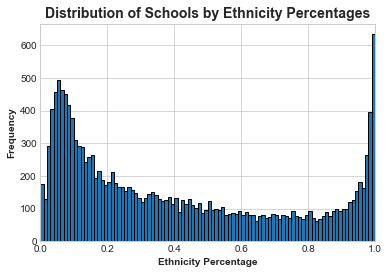

In [30]:
crdc_1516_cleaned.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

** Add Ethnicity Percentage Quintile **

In [31]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

# <font color = green> Filter non-Yes Schools and Examine Characteristics </font>

In [32]:
def school_grade_range(df):
    """Calculates the number of schools in a given DataFrame (df) of a particular distribution of grades:
        Example:  If a school (in df) offers grades 9,10,11,12 exclusively, they are placed in the '9-12' 
                    category. """
    df_grade_range = []
    for index, row in df.iterrows():
        grade_range = []

        if row.SCH_GRADE_G12 == 'Yes':
            grade_range.append(12)
        if row.SCH_GRADE_G11 == 'Yes':
            grade_range.append(11)
        if row.SCH_GRADE_G10 == 'Yes':
            grade_range.append(10)
        if row.SCH_GRADE_G09 == 'Yes':
            grade_range.append(9)
        if row.SCH_GRADE_G08 == 'Yes':
            grade_range.append(8)
        if row.SCH_GRADE_G07 == 'Yes':
            grade_range.append(7)
        if row.SCH_GRADE_G06 == 'Yes':
            grade_range.append(6)
        if row.SCH_GRADE_G05 == 'Yes':
            grade_range.append(5)
        if row.SCH_GRADE_G04 == 'Yes':
            grade_range.append(4)
        if row.SCH_GRADE_G03 == 'Yes':
            grade_range.append(3)
        if row.SCH_GRADE_G02 == 'Yes':
            grade_range.append(2)
        if row.SCH_GRADE_G01 == 'Yes':
            grade_range.append(1)
        if row.SCH_GRADE_KG == 'Yes':
            grade_range.append('kg')
        if row.SCH_GRADE_PS == 'Yes':
            grade_range.append('pk')
        
        if grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg','pk']:
            df_grade_range.append('pk-12')
        elif grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg']:
            df_grade_range.append('kg-12')
        elif grade_range == [12,11,10,9,8,7,6,5]:
            df_grade_range.append('05-12')
        elif grade_range == [12,11,10,9,8,7,6]:
            df_grade_range.append('06-12')
        elif grade_range == [12,11,10,9,8,7]:
            df_grade_range.append('07-12')
        elif grade_range == [12,11,10,9,8]:
            df_grade_range.append('08-12')
        elif grade_range == [12,11,10,9]:
            df_grade_range.append('09-12')
        elif grade_range == [11,10,9]:
            df_grade_range.append('09-11')
        elif grade_range == [10,9]:
            df_grade_range.append('09-10')
        elif grade_range == [12,11,10]:
            df_grade_range.append('10-12')
        elif grade_range == [12,11]:
            df_grade_range.append('11-12')
        elif grade_range == [12]:
            df_grade_range.append('12-only')
        else:
            df_grade_range.append('other')
    return pd.DataFrame(df_grade_range, columns=['grade_range'])

In [33]:
def have_gr9_or_younger(df):
    """Calculates the number of schools in a given DataFrame (df) offer grades of 8th or younger (i.e. non-high school grades)"""
    count = 0
    for index, row in df.iterrows():
        if row.SCH_GRADE_G08 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G07 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G06 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G05 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G04 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G03 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G02 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G01 == 'Yes':
            count += 1
        elif row.SCH_GRADE_KG == 'Yes':
            count += 1
        elif row.SCH_GRADE_PS == 'Yes':
            count += 1
    return round(count / len(df),3)

**DE**

In [34]:
crdc_1516_deYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_DUAL_IND == 'Yes']

In [35]:
"""Number of schools which responded 'Yes' to the DE_Flag """
len(crdc_1516_deYes)

11563

In [36]:
with pd.option_context('display.max_columns', 150):
    display(crdc_1516_deYes[crdc_1516_deYes.SCH_GRADE_KG == 'Yes'])

,COMBOKEY,SCH_NAME,GSHI,GSLO,High_Grade_12,JJ,LAT1516,LEAID,LEA_NAME,LEA_STATE,LEA_STATE_NAME,LEVEL,LOCALE15,LON1516,Low_Grade_Above9,NMCNTY15,SCHID,SCH_APENR_AM_F,SCH_APENR_AM_M,SCH_APENR_AS_F,SCH_APENR_AS_M,SCH_APENR_BL_F,SCH_APENR_BL_M,SCH_APENR_HI_F,SCH_APENR_HI_M,SCH_APENR_HP_F,SCH_APENR_HP_M,SCH_APENR_IDEA_F,SCH_APENR_IDEA_M,SCH_APENR_IND,SCH_APENR_LEP_F,SCH_APENR_LEP_M,SCH_APENR_TR_F,SCH_APENR_TR_M,SCH_APENR_WH_F,SCH_APENR_WH_M,SCH_DUALENR_AM_F,SCH_DUALENR_AM_M,SCH_DUALENR_AS_F,SCH_DUALENR_AS_M,SCH_DUALENR_BL_F,SCH_DUALENR_BL_M,SCH_DUALENR_HI_F,SCH_DUALENR_HI_M,SCH_DUALENR_HP_F,SCH_DUALENR_HP_M,SCH_DUALENR_IDEA_F,SCH_DUALENR_IDEA_M,SCH_DUALENR_LEP_F,SCH_DUALENR_LEP_M,SCH_DUALENR_TR_F,SCH_DUALENR_TR_M,SCH_DUALENR_WH_F,SCH_DUALENR_WH_M,SCH_DUAL_IND,SCH_ENR_AM_F,SCH_ENR_AM_M,SCH_ENR_AS_F,SCH_ENR_AS_M,SCH_ENR_BL_F,SCH_ENR_BL_M,SCH_ENR_HI_F,SCH_ENR_HI_M,SCH_ENR_HP_F,SCH_ENR_HP_M,SCH_ENR_IDEA_F,SCH_ENR_IDEA_M,SCH_ENR_LEP_F,SCH_ENR_LEP_M,SCH_ENR_TR_F,SCH_ENR_TR_M,SCH_ENR_WH_F,SCH_ENR_WH_M,SCH_GRADE_G01,SCH_GRADE_G02,...,SCH_GRADE_UG,SCH_IBENR_AM_F,SCH_IBENR_AM_M,SCH_IBENR_AS_F,SCH_IBENR_AS_M,SCH_IBENR_BL_F,SCH_IBENR_BL_M,SCH_IBENR_HI_F,SCH_IBENR_HI_M,SCH_IBENR_HP_F,SCH_IBENR_HP_M,SCH_IBENR_IDEA_F,SCH_IBENR_IDEA_M,SCH_IBENR_IND,SCH_IBENR_LEP_F,SCH_IBENR_LEP_M,SCH_IBENR_TR_F,SCH_IBENR_TR_M,SCH_IBENR_WH_F,SCH_IBENR_WH_M,SCH_STATUS_ALT,SCH_STATUS_CHARTER,SCH_STATUS_MAGNET,SCH_STATUS_SPED,SCH_TYPE,SCH_TYPE_TEXT,SCH_UGDETAIL_HS,STABR,TITLEI,TOT_APENR_F,TOT_APENR_M,TOT_DUALENR_F,TOT_DUALENR_M,TOT_ENR_F,TOT_ENR_M,TOT_IBENR_F,TOT_IBENR_M,VIRTUAL,total_enrollment,total_white_enrollment,total_nonwhite_enrollment,total_hi_enrollment,total_am_enrollment,total_as_enrollment,total_bl_enrollment,total_hp_enrollment,total_tr_enrollment,total_lep_enrollment,total_idea_enrollment,de_total_enrollment,de_white_enrollment,de_nonwhite_enrollment,de_hi_enrollment,de_am_enrollment,de_as_enrollment,de_bl_enrollment,de_hp_enrollment,de_tr_enrollment,de_lep_enrollment,de_idea_enrollment,ap_total_enrollment,ap_white_enrollment,ap_nonwhite_enrollment,ap_hi_enrollment,ap_am_enrollment,ap_as_enrollment,ap_bl_enrollment,ap_hp_enrollment,ap_tr_enrollment,ap_lep_enrollment,ap_idea_enrollment,size_group,region_accred,pct_eth,eth_quintile
2959,='120183001946',SUWANNEE HIGH SCHOOL,12,9,Yes,No,30.284342,1201830,SUWANNEE,FL,FLORIDA,3,33,-82.991414,Yes,Suwannee County,1946,0,0,0,2,5,5,11,8,0,0,0,2,Yes,0,0,5,5,50,47,0,0,0,0,2,0,2,2,0,0,2,0,0,0,2,2,44,23,Yes,2,2,5,8,110,95,95,110,0,0,52,91,14,20,29,23,377,401,No,No,...,No,0,0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,FL,Yes,71,67,50,27,618,639,0,0,No,1257,778,479,205,4,13,205,0,52,34,143,77,67,10,4,0,0,2,0,4,0,2,138,97,41,19,0,2,10,0,10,0,2,4,SACS,0.381066,2
3053,='130105003525',Chattahoochee County High School,12,9,Yes,No,32.312421,1301050,Chattahoochee County,GA,GEORGIA,3,42,-84.754388,Yes,Chattahoochee County,3525,0,0,0,2,11,5,5,2,0,0,0,2,Yes,0,0,2,2,17,11,0,0,2,2,17,20,17,14,0,2,5,11,2,2,2,5,35,47,Yes,2,0,2,5,47,68,41,50,0,2,10,43,5,5,5,17,92,128,Yes,Yes,...,No,0,0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,GA,No,35,22,73,90,189,270,0,0,No,459,220,239,91,2,7,115,2,22,10,53,163,82,81,31,0,4,37,2,7,4,16,57,28,29,7,0,2,16,0,4,0,2,2,SACS,0.520697,3
4011,='173210003360',Polo Comm High School,12,9,Yes,No,41.985939,1732100,Polo CUSD 222,IL,ILLINOIS,3,42,-89.568212,Yes,Ogle County,3360,0,0,0,0,0,0,0,2,0,0,0,0,Yes,0,0,0,0,14,2,0,0,0,2,0,0,2,5,0,0,0,0,0,0,0,0,14,8,Yes,0,0,0,2,2,2,2,8,0,0,4,13,2,2,2,2,74,86,Yes,Yes,...,No,0,0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,IL,Yes,14,4,16,15,80,100,0,0,No,180,160,20,10,0,2,4,0,4,4,17,31,22,9,7,0,2,0,0,0,0,0,18,16,2,2,0,0,0,0,0,0,0,2,HLC,0.111111,1
4484,='190002400961',South Central Calhoun High School,12,9,Yes,No,42.266731,1900024,South Central Calhoun Comm School District,IA,IOWA,3,43,-94.742122,Yes,Calhoun County,961,0,0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,2,0,0,0,5,2,38,38,Yes,0,0,2

In [37]:
"""Distribution of Grade Ranges for the De-Yes set (Part 1)"""
deYes_grade_range_list = school_grade_range(crdc_1516_deYes).join(crdc_1516_deYes['total_enrollment'].reset_index(drop = True), how = 'outer')

In [38]:
"""Distribution of Grade Ranges for the De-Yes set (Part 2)"""
deYes_grade_range_dist = deYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
deYes_grade_range_dist['pct_of_schools'] = round(deYes_grade_range_dist['grade_range'] / len(deYes_grade_range_list), 3)

deYes_grade_range_enrollments = pd.DataFrame(deYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
deYes_grade_range_enrollments['pct_of_total_enrollment'] = round(deYes_grade_range_enrollments['total_enrollment'] / crdc_1516_deYes['total_enrollment'].sum(), 3)

deYes_grade_range_dist.join(deYes_grade_range_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment
index,,,,
05-12,1,0.000,79,0.000
06-12,12,0.001,3701,0.000
07-12,1615,0.140,551841,0.053
08-12,193,0.017,155456,0.015
09-10,5,0.000,1191,0.000
09-11,6,0.001,2404,0.000
09-12,9322,0.806,9155511,0.887
10-12,207,0.018,249864,0.024
11-12,47,0.004,17828,0.002


In [39]:
"""What portion of schools that offer DE have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_deYes)

0.17

In [40]:
de_total_enrollment = crdc_1516_deYes['de_total_enrollment'].sum()
display(de_total_enrollment)
crdc_1516_cleaned['de_total_enrollment'].sum()

1075825

1075825

** AP **

In [41]:
crdc_1516_apYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_APENR_IND == 'Yes']

In [42]:
"""Number of schools which responded 'Yes' to the AP_Flag """
len(crdc_1516_apYes)

11530

In [43]:
"""Distribution of Grade Ranges for the Ap-Yes set (Part 1)"""
apYes_grade_range_list = school_grade_range(crdc_1516_apYes).join(crdc_1516_apYes['total_enrollment'].reset_index(drop = True), how = 'outer')

In [44]:
"""Distribution of Grade Ranges for the AP-Yes set (Part 2)"""
apYes_grade_range_dist = apYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
apYes_grade_range_dist['pct_of_schools'] = round(apYes_grade_range_dist['grade_range'] / len(apYes_grade_range_list), 3)

apYes_grade_range_enrollments = pd.DataFrame(apYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
apYes_grade_range_enrollments['pct_of_total_enrollment'] = round(apYes_grade_range_enrollments['total_enrollment'] / crdc_1516_apYes['total_enrollment'].sum(), 3)

apYes_grade_range_dist.join(apYes_grade_range_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment
index,,,,
06-12,10,0.001,6849,0.001
07-12,949,0.082,490604,0.039
08-12,197,0.017,188906,0.015
09-10,5,0.000,1334,0.000
09-11,18,0.002,6952,0.001
09-12,9956,0.863,11243659,0.903
10-12,224,0.019,293327,0.024
11-12,25,0.002,14761,0.001
12-only,1,0.000,391,0.000


In [45]:
"""What portion of schools that offer AP have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_apYes)

0.112

In [46]:
ap_total_enrollment = crdc_1516_apYes['ap_total_enrollment'].sum()
display(ap_total_enrollment)
crdc_1516_cleaned['ap_total_enrollment'].sum()

2651611

2651611

# <font color = green> Analysis </font>

# I. Overall 

** Total Enrollment in all schools **

In [47]:
crdc_1516_cleaned['total_enrollment'].sum()

13627606

**Total Enrollment in DE-offering schools**

In [48]:
deOffering_total_enrollment = crdc_1516_deYes['total_enrollment'].sum()
deOffering_total_enrollment

10323385

**Total Enrollment in AP-offering schools**

In [49]:
apOffering_total_enrollment = crdc_1516_apYes['total_enrollment'].sum()
apOffering_total_enrollment

12450863

## II. By Gender

** DE-enrolled **

In [50]:
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()
de_pct_m = round(total_dualEnr_m / (de_total_enrollment), 3)
de_pct_f = round(total_dualEnr_f / (de_total_enrollment), 3)
print('Male:', total_dualEnr_m, ' (', de_pct_m, ')')
print('Female: ', total_dualEnr_f, ' (', de_pct_f, ')')

Male: 488505  ( 0.454 )
Female:  587320  ( 0.546 )


** AP-enrolled **

In [51]:
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()
ap_pct_m = round(total_apEnr_m / (ap_total_enrollment), 3)
ap_pct_f = round(total_apEnr_f / (ap_total_enrollment), 3)
print('Male:', total_apEnr_m, ' (', ap_pct_m, ')')
print('Female: ', total_apEnr_f, ' (', ap_pct_f, ')')

Male: 1160832  ( 0.438 )
Female:  1490779  ( 0.562 )


**Totals in DE-Offering Schools**

In [52]:
total_enr_deOffering_m = crdc_1516_deYes['TOT_ENR_M'].sum()
total_enr_deOffering_f = crdc_1516_deYes['TOT_ENR_F'].sum()
deOffering_pct_m = round(total_enr_deOffering_m / (deOffering_total_enrollment), 3)
deOffering_pct_f = round(total_enr_deOffering_f / (deOffering_total_enrollment), 3)
print('Male:', total_enr_deOffering_m, ' (', deOffering_pct_m, ')')
print('Female: ', total_enr_deOffering_f, ' (', deOffering_pct_f, ')')

Male: 5268245  ( 0.51 )
Female:  5055140  ( 0.49 )


**Totals in AP-Offering Schools**

In [53]:
total_enr_apOffering_m = crdc_1516_apYes['TOT_ENR_M'].sum()
total_enr_apOffering_f = crdc_1516_apYes['TOT_ENR_F'].sum()
apOffering_pct_m = round(total_enr_apOffering_m / (apOffering_total_enrollment), 3)
apOffering_pct_f = round(total_enr_apOffering_f / (apOffering_total_enrollment), 3)
print('Male:', total_enr_apOffering_m, ' (', apOffering_pct_m, ')')
print('Female: ', total_enr_apOffering_f, ' (', apOffering_pct_f, ')')

Male: 6352148  ( 0.51 )
Female:  6098715  ( 0.49 )


**Visualizing the differences**

In [54]:
print('Females make up ' + str(deOffering_pct_f * 100) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_f * 100,1)) + '% ' +
      'of the total DE enrollment.')

Females make up 49.0% of the total enrollment of schools that offer DE-courses, but make up 54.6% of the total DE enrollment.


In [55]:
print('Females make up ' + str(apOffering_pct_f * 100) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(ap_pct_f * 100) + '% ' +
      'of the total AP enrollment.')

Females make up 49.0% of the total enrollment of schools that offer AP-courses, but make up 56.2% of the total AP enrollment.


## III. By Race

** DE **

In [56]:
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()

de_pct_hi = round(total_dualEnr_hi / (de_total_enrollment), 3)
de_pct_am = round(total_dualEnr_am / (de_total_enrollment), 3)
de_pct_as = round(total_dualEnr_as / (de_total_enrollment), 3)
de_pct_bl = round(total_dualEnr_bl / (de_total_enrollment), 3)
de_pct_hp = round(total_dualEnr_hp / (de_total_enrollment), 3)
de_pct_tr = round(total_dualEnr_tr / (de_total_enrollment), 3)
de_pct_wh = round(total_dualEnr_wh / (de_total_enrollment), 3)


print('Hispanic:', total_dualEnr_hi, ' (', de_pct_hi, ')')
print('American Indian/Alaska Native:', total_dualEnr_am, ' (', de_pct_am, ')')
print('Asian:', total_dualEnr_as, ' (', de_pct_as, ')')
print('Black:', total_dualEnr_bl, ' (', de_pct_bl, ')')
print('Native Hawaiian/Pacific Islander:', total_dualEnr_hp, ' (', de_pct_hp, ')')
print('Two or More Races:', total_dualEnr_tr, ' (', de_pct_tr, ')')
print('White:', total_dualEnr_wh, ' (', de_pct_wh, ')')


Hispanic: 178849  ( 0.166 )
American Indian/Alaska Native: 9937  ( 0.009 )
Asian: 52206  ( 0.049 )
Black: 93159  ( 0.087 )
Native Hawaiian/Pacific Islander: 3742  ( 0.003 )
Two or More Races: 28768  ( 0.027 )
White: 709164  ( 0.659 )


** AP **

In [57]:
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

ap_pct_hi = round(total_apEnr_hi / (ap_total_enrollment), 3)
ap_pct_am = round(total_apEnr_am / (ap_total_enrollment), 3)
ap_pct_as = round(total_apEnr_as / (ap_total_enrollment), 3)
ap_pct_bl = round(total_apEnr_bl / (ap_total_enrollment), 3)
ap_pct_hp = round(total_apEnr_hp / (ap_total_enrollment), 3)
ap_pct_tr = round(total_apEnr_tr / (ap_total_enrollment), 3)
ap_pct_wh = round(total_apEnr_wh / (ap_total_enrollment), 3)


print('Hispanic:', total_apEnr_hi, ' (', ap_pct_hi, ')')
print('American Indian/Alaska Native:', total_apEnr_am, ' (', ap_pct_am, ')')
print('Asian:', total_apEnr_as, ' (', ap_pct_as, ')')
print('Black:', total_apEnr_bl, ' (', ap_pct_bl, ')')
print('Native Hawaiian/Pacific Islanapr:', total_apEnr_hp, ' (', ap_pct_hp, ')')
print('Two or More Races:', total_apEnr_tr, ' (', ap_pct_tr, ')')
print('White:', total_apEnr_wh, ' (', ap_pct_wh, ')')


Hispanic: 557068  ( 0.21 )
American Indian/Alaska Native: 16399  ( 0.006 )
Asian: 282696  ( 0.107 )
Black: 241694  ( 0.091 )
Native Hawaiian/Pacific Islanapr: 9567  ( 0.004 )
Two or More Races: 77762  ( 0.029 )
White: 1466425  ( 0.553 )


**Totals in DE-Offering Schools**

In [58]:
total_enr_deOffering_hi = crdc_1516_deYes['total_hi_enrollment'].sum()
total_enr_deOffering_am = crdc_1516_deYes['total_am_enrollment'].sum()
total_enr_deOffering_as = crdc_1516_deYes['total_as_enrollment'].sum()
total_enr_deOffering_bl = crdc_1516_deYes['total_bl_enrollment'].sum()
total_enr_deOffering_hp = crdc_1516_deYes['total_hp_enrollment'].sum()
total_enr_deOffering_tr = crdc_1516_deYes['total_tr_enrollment'].sum()
total_enr_deOffering_wh = crdc_1516_deYes['total_white_enrollment'].sum()

deOffering_pct_hi = round(total_enr_deOffering_hi / (deOffering_total_enrollment), 3)
deOffering_pct_am = round(total_enr_deOffering_am / (deOffering_total_enrollment), 3)
deOffering_pct_as = round(total_enr_deOffering_as / (deOffering_total_enrollment), 3)
deOffering_pct_bl = round(total_enr_deOffering_bl / (deOffering_total_enrollment), 3)
deOffering_pct_hp = round(total_enr_deOffering_hp / (deOffering_total_enrollment), 3)
deOffering_pct_tr = round(total_enr_deOffering_tr / (deOffering_total_enrollment), 3)
deOffering_pct_wh = round(total_enr_deOffering_wh / (deOffering_total_enrollment), 3)

print('Hispanic:', total_enr_deOffering_hi, ' (', deOffering_pct_hi, ')')
print('American Indian/Alaska Native:', total_enr_deOffering_am, ' (', deOffering_pct_am, ')')
print('Asian:', total_enr_deOffering_as, ' (', deOffering_pct_as, ')')
print('Black:', total_enr_deOffering_bl, ' (', deOffering_pct_bl, ')')
print('Native Hawaiian/Pacific Islander:', total_enr_deOffering_hp, ' (', deOffering_pct_hp, ')')
print('Two or More Races:', total_enr_deOffering_tr, ' (', deOffering_pct_tr, ')')
print('White:', total_enr_deOffering_wh, ' (', deOffering_pct_wh, ')')

Hispanic: 2191491  ( 0.212 )
American Indian/Alaska Native: 100807  ( 0.01 )
Asian: 470331  ( 0.046 )
Black: 1558033  ( 0.151 )
Native Hawaiian/Pacific Islander: 42810  ( 0.004 )
Two or More Races: 290697  ( 0.028 )
White: 5669216  ( 0.549 )


**Totals in AP-Offering Schools**

In [59]:
total_enr_apOffering_hi = crdc_1516_apYes['total_hi_enrollment'].sum()
total_enr_apOffering_am = crdc_1516_apYes['total_am_enrollment'].sum()
total_enr_apOffering_as = crdc_1516_apYes['total_as_enrollment'].sum()
total_enr_apOffering_bl = crdc_1516_apYes['total_bl_enrollment'].sum()
total_enr_apOffering_hp = crdc_1516_apYes['total_hp_enrollment'].sum()
total_enr_apOffering_tr = crdc_1516_apYes['total_tr_enrollment'].sum()
total_enr_apOffering_wh = crdc_1516_apYes['total_white_enrollment'].sum()

apOffering_pct_hi = round(total_enr_apOffering_hi / (apOffering_total_enrollment), 3)
apOffering_pct_am = round(total_enr_apOffering_am / (apOffering_total_enrollment), 3)
apOffering_pct_as = round(total_enr_apOffering_as / (apOffering_total_enrollment), 3)
apOffering_pct_bl = round(total_enr_apOffering_bl / (apOffering_total_enrollment), 3)
apOffering_pct_hp = round(total_enr_apOffering_hp / (apOffering_total_enrollment), 3)
apOffering_pct_tr = round(total_enr_apOffering_tr / (apOffering_total_enrollment), 3)
apOffering_pct_wh = round(total_enr_apOffering_wh / (apOffering_total_enrollment), 3)

print('Hispanic:', total_enr_apOffering_hi, ' (', apOffering_pct_hi, ')')
print('American Indian/Alaska Native:', total_enr_apOffering_am, ' (', apOffering_pct_am, ')')
print('Asian:', total_enr_apOffering_as, ' (', apOffering_pct_as, ')')
print('Black:', total_enr_apOffering_bl, ' (', apOffering_pct_bl, ')')
print('Native Hawaiian/Pacific Islanapr:', total_enr_apOffering_hp, ' (', apOffering_pct_hp, ')')
print('Two or More Races:', total_enr_apOffering_tr, ' (', apOffering_pct_tr, ')')
print('White:', total_enr_apOffering_wh, ' (', apOffering_pct_wh, ')')

Hispanic: 3027732  ( 0.243 )
American Indian/Alaska Native: 109569  ( 0.009 )
Asian: 685607  ( 0.055 )
Black: 1846926  ( 0.148 )
Native Hawaiian/Pacific Islanapr: 54574  ( 0.004 )
Two or More Races: 355314  ( 0.029 )
White: 6371141  ( 0.512 )


**Visualizing**

In [60]:
de_race_stats = pd.DataFrame(data = [[deOffering_pct_hi, de_pct_hi], 
                                    [deOffering_pct_am, de_pct_am], 
                                    [deOffering_pct_as, de_pct_as], 
                                    [deOffering_pct_bl, de_pct_bl], 
                                    [deOffering_pct_hp, de_pct_hp],
                                    [deOffering_pct_tr, de_pct_tr], 
                                    [deOffering_pct_wh, de_pct_wh]], 
                            index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                            columns = ['All Students in DE-Yes', 'DE-Students'])
de_race_stats

,All Students in DE-Yes,DE-Students
Hispanic,0.212,0.166
Native American,0.010,0.009
Asian,0.046,0.049
Black,0.151,0.087
Native Hawaiian,0.004,0.003
Two or More Races,0.028,0.027
White,0.549,0.659


In [61]:
print('Hispanics make up ' + str(deOffering_pct_hi * 100) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_hi * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Native Americans/Native Alaskans make up ' + str(round(deOffering_pct_am * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_am * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Asians make up ' + str(round(deOffering_pct_as * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_as * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Blacks make up ' + str(round(deOffering_pct_bl * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_bl * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Native Hawaiian/Pacific Islanders make up ' + str(round(deOffering_pct_hp * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_hp * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Individuals of Two or More Races make up ' + str(round(deOffering_pct_tr * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_tr * 100,1)) + '% ' +
      'of the total DE enrollment.')
print('')
print('Whites make up ' + str(round(deOffering_pct_wh * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_wh * 100,1)) + '% ' +
      'of the total DE enrollment.')

Hispanics make up 21.2% of the total enrollment of schools that offer DE-courses, but make up 16.6% of the total DE enrollment.

Native Americans/Native Alaskans make up 1.0% of the total enrollment of schools that offer DE-courses, but make up 0.9% of the total DE enrollment.

Asians make up 4.6% of the total enrollment of schools that offer DE-courses, but make up 4.9% of the total DE enrollment.

Blacks make up 15.1% of the total enrollment of schools that offer DE-courses, but make up 8.7% of the total DE enrollment.

Native Hawaiian/Pacific Islanders make up 0.4% of the total enrollment of schools that offer DE-courses, but make up 0.3% of the total DE enrollment.

Individuals of Two or More Races make up 2.8% of the total enrollment of schools that offer DE-courses, but make up 2.7% of the total DE enrollment.

Whites make up 54.9% of the total enrollment of schools that offer DE-courses, but make up 65.9% of the total DE enrollment.


In [62]:
print('Hispanics make up ' + str(apOffering_pct_hi * 100) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_hi * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Native Americans/Native Alaskans make up ' + str(round(apOffering_pct_am * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_am * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Asians make up ' + str(round(apOffering_pct_as * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_as * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Blacks make up ' + str(round(apOffering_pct_bl * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_bl * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Native Hawaiian/Pacific Islanaprs make up ' + str(round(apOffering_pct_hp * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_hp * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Individuals of Two or More Races make up ' + str(round(apOffering_pct_tr * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_tr * 100,1)) + '% ' +
      'of the total AP enrollment.')
print('')
print('Whites make up ' + str(round(apOffering_pct_wh * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_wh * 100,1)) + '% ' +
      'of the total AP enrollment.')

Hispanics make up 24.3% of the total enrollment of schools that offer AP-courses, but make up 21.0% of the total AP enrollment.

Native Americans/Native Alaskans make up 0.9% of the total enrollment of schools that offer AP-courses, but make up 0.6% of the total AP enrollment.

Asians make up 5.5% of the total enrollment of schools that offer AP-courses, but make up 10.7% of the total AP enrollment.

Blacks make up 14.8% of the total enrollment of schools that offer AP-courses, but make up 9.1% of the total AP enrollment.

Native Hawaiian/Pacific Islanaprs make up 0.4% of the total enrollment of schools that offer AP-courses, but make up 0.4% of the total AP enrollment.

Individuals of Two or More Races make up 2.9% of the total enrollment of schools that offer AP-courses, but make up 2.9% of the total AP enrollment.

Whites make up 51.2% of the total enrollment of schools that offer AP-courses, but make up 55.3% of the total AP enrollment.


### IV.a Race By State

In [63]:
de_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['de_nonwhite_enrollment'].sum()
de_state_white = crdc_1516_deYes.groupby(['LEA_STATE'])['de_white_enrollment'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
deOffering_state_white = crdc_1516_deYes.groupby(['LEA_STATE'])['total_white_enrollment'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_stats = pd.DataFrame([de_state_white, de_state_nonwhite, de_state_total]).T
deOffering_state_stats = pd.DataFrame([deOffering_state_white, deOffering_state_nonwhite, deOffering_state_total]).T

de_state_stats['de_white_enrollment'] = round(de_state_stats['de_white_enrollment'] / de_state_stats['de_total_enrollment'],3)
de_state_stats['de_nonwhite_enrollment'] = round(de_state_stats['de_nonwhite_enrollment'] / de_state_stats['de_total_enrollment'],3)
de_state_stats.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_stats['total_white_enrollment'] = round(deOffering_state_stats['total_white_enrollment'] / deOffering_state_stats['total_enrollment'],3)
deOffering_state_stats['total_nonwhite_enrollment'] = rousnd(deOffering_state_stats['total_nonwhite_enrollment'] / deOffering_state_stats['total_enrollment'],3)
deOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_stats = deOffering_state_stats.rename({'total_white_enrollment':'Pct White in DE-Yes', 'total_nonwhite_enrollment':'Pct Non-White in DE-Yes'}, axis = 'columns')
de_state_stats = de_state_stats.rename({'de_white_enrollment':'Pct White DE-Students', 'de_nonwhite_enrollment':'Pct Non-White DE-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_stats_final = deOffering_state_stats.join(de_state_stats, how = 'inner')

de_state_stats_final['Non-White Gap'] = de_state_stats_final['Pct Non-White DE-Students'] - de_state_stats_final['Pct Non-White in DE-Yes']

""" Which states have the most under-represented Non-White groups? """
de_state_stats_final.sort_values('Non-White Gap')

NameError: name 'rousnd' is not defined

In [ ]:
ap_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_nonwhite_enrollment'].sum()
ap_state_white = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_white_enrollment'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
apOffering_state_white = crdc_1516_apYes.groupby(['LEA_STATE'])['total_white_enrollment'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_stats = pd.DataFrame([ap_state_white, ap_state_nonwhite, ap_state_total]).T
apOffering_state_stats = pd.DataFrame([apOffering_state_white, apOffering_state_nonwhite, apOffering_state_total]).T

ap_state_stats['ap_white_enrollment'] = round(ap_state_stats['ap_white_enrollment'] / ap_state_stats['ap_total_enrollment'],3)
ap_state_stats['ap_nonwhite_enrollment'] = round(ap_state_stats['ap_nonwhite_enrollment'] / ap_state_stats['ap_total_enrollment'],3)
ap_state_stats.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_stats['total_white_enrollment'] = round(apOffering_state_stats['total_white_enrollment'] / apOffering_state_stats['total_enrollment'],3)
apOffering_state_stats['total_nonwhite_enrollment'] = round(apOffering_state_stats['total_nonwhite_enrollment'] / apOffering_state_stats['total_enrollment'],3)
apOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_stats = apOffering_state_stats.rename({'total_white_enrollment':'Pct White in ap-Yes', 'total_nonwhite_enrollment':'Pct Non-White in ap-Yes'}, axis = 'columns')
ap_state_stats = ap_state_stats.rename({'ap_white_enrollment':'Pct White ap-Stuapnts', 'ap_nonwhite_enrollment':'Pct Non-White ap-Stuapnts'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_stats_final = apOffering_state_stats.join(ap_state_stats, how = 'inner')

ap_state_stats_final['Non-White Gap'] = ap_state_stats_final['Pct Non-White ap-Stuapnts'] - ap_state_stats_final['Pct Non-White in ap-Yes']

""" Which states have the most unapr-represented Non-White groups? """
ap_state_stats_final.sort_values('Non-White Gap')

# IV. By LEP

**DE**

In [ ]:
total_dualEnr_lep = crdc_1516_deYes['de_lep_enrollment'].sum()

de_pct_lep = round(total_dualEnr_lep / (de_total_enrollment), 3)

print('LEP:', total_dualEnr_lep, ' (', de_pct_lep, ')')

**AP**

In [ ]:
total_apEnr_lep = crdc_1516_apYes['ap_lep_enrollment'].sum()

ap_pct_lep = round(total_apEnr_lep / (ap_total_enrollment), 3)

print('LEP:', total_apEnr_lep, ' (', ap_pct_lep, ')')

**Totals in DE-Offering Schools**

In [ ]:
total_enr_deOffering_lep = crdc_1516_deYes['total_lep_enrollment'].sum()

deOffering_pct_lep = round(total_enr_deOffering_lep / (deOffering_total_enrollment), 3)

print('LEP:', total_enr_deOffering_lep, ' (', deOffering_pct_lep, ')')

**Totals in AP-Offering Schools**

In [ ]:
total_enr_apOffering_lep = crdc_1516_apYes['total_lep_enrollment'].sum()

apOffering_pct_lep = round(total_enr_apOffering_lep / (apOffering_total_enrollment), 3)

print('LEP:', total_enr_apOffering_lep, ' (', apOffering_pct_lep, ')')

**Visualizing**

In [ ]:
print('LEP Individuals make up ' + str(deOffering_pct_lep * 100) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_lep * 100,1)) + '% ' +
      'of the total DE enrollment.')

In [ ]:
print('LEP Individuals make up ' + str(round(apOffering_pct_lep * 100,1)) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_lep * 100,1)) + '% ' +
      'of the total AP enrollment.')

# V. By IDEA

**DE**

In [ ]:
total_deEnr_idea = crdc_1516_deYes['de_idea_enrollment'].sum()

de_pct_idea = round(total_deEnr_idea / (de_total_enrollment), 3)

print('IDEA:', total_deEnr_idea, ' (', de_pct_idea, ')')

**AP**

In [ ]:
total_apEnr_idea = crdc_1516_apYes['ap_idea_enrollment'].sum()

ap_pct_idea = round(total_apEnr_idea / (ap_total_enrollment), 3)

print('IDEA:', total_apEnr_idea, ' (', ap_pct_idea, ')')

**Totals in DE-Offering Schools**

In [ ]:
total_enr_deOffering_idea = crdc_1516_deYes['total_idea_enrollment'].sum()

deOffering_pct_idea = round(total_enr_deOffering_idea / (deOffering_total_enrollment), 3)

print('IDEA:', total_enr_deOffering_idea, ' (', deOffering_pct_idea, ')')

**Totals in AP-Offering Schools**

In [ ]:
total_enr_apOffering_idea = crdc_1516_apYes['total_idea_enrollment'].sum()

apOffering_pct_idea = round(total_enr_apOffering_idea / (apOffering_total_enrollment), 3)

print('IDEA:', total_enr_apOffering_idea, ' (', apOffering_pct_idea, ')')

**Visualizing**

In [ ]:
print('IDEA Individuals make up ' + str(deOffering_pct_idea * 100) + '% ' + 
      'of the total enrollment of schools that offer DE-courses, but make up ' + str(round(de_pct_idea * 100,1)) + '% ' +
      'of the total DE enrollment.')

In [ ]:
print('IDEA Individuals make up ' + str(apOffering_pct_idea * 100) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(round(ap_pct_idea * 100,1)) + '% ' +
      'of the total AP enrollment.')

## VI. By State

** DE **

In [ ]:
deOffering_state_total = crdc_1516_deYes.groupby('LEA_STATE')['total_enrollment'].sum().reset_index()
de_state_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['de_total_enrollment'].sum().reset_index()
de_state = de_state_enrollment.merge(deOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [ ]:
de_state['de_pct_enrolled'] = round(de_state['de_total_enrollment'] / de_state['total_enrollment'], 3)
de_state.sort_values('de_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

In [ ]:
de_data = dict(type = 'choropleth',
            locations = de_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = de_state['de_pct_enrolled'])

de_layout = dict(title = 'Percentage of Total Enrollment in DE',
    geo = {'scope':'usa'})

de_choromap = go.Figure(data = [de_data], layout = de_layout)

In [ ]:
iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

** AP **

In [ ]:
apOffering_state_total = crdc_1516_apYes.groupby('LEA_STATE')['total_enrollment'].sum().reset_index()
ap_state_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['ap_total_enrollment'].sum().reset_index()
ap_state = ap_state_enrollment.merge(apOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [ ]:
ap_state['ap_pct_enrolled'] = round(ap_state['ap_total_enrollment'] / ap_state['total_enrollment'], 3)
ap_state.sort_values('ap_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

In [ ]:
ap_data = dict(type = 'choropleth',
            locations = ap_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = ap_state['ap_pct_enrolled'])

ap_layout = dict(title = 'Percentage of Total Enrollment in AP',
    geo = {'scope':'usa'})

ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

In [ ]:
iplot(ap_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

# VII. By Region

**DE**

In [ ]:
deOffering_region_total = crdc_1516_deYes.groupby('region_accred')['total_enrollment'].sum().reset_index()
de_region_enrollment = crdc_1516_deYes.groupby('region_accred')['de_total_enrollment'].sum().reset_index()
de_region = de_region_enrollment.merge(deOffering_region_total, how = 'inner', on = 'region_accred')

In [ ]:
de_region['de_pct_enrolled'] = round(de_region['de_total_enrollment'] / de_region['total_enrollment'], 3)
de_region.sort_values('de_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

**AP**

In [ ]:
apOffering_region_total = crdc_1516_apYes.groupby('region_accred')['total_enrollment'].sum().reset_index()
ap_region_enrollment = crdc_1516_apYes.groupby('region_accred')['ap_total_enrollment'].sum().reset_index()
ap_region = ap_region_enrollment.merge(apOffering_region_total, how = 'inner', on = 'region_accred')

In [ ]:
ap_region['ap_pct_enrolled'] = round(ap_region['ap_total_enrollment'] / ap_region['total_enrollment'], 3)
ap_region.sort_values('ap_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

**Visualizations**

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_region.plot.bar(x='region_accred', y='de_pct_enrolled', ax=ax1)
plt.title('DE Participation in DE-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,.3,.05))
plt.xlabel('')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_region.plot.bar(x='region_accred', y='ap_pct_enrolled', ax=ax2)
plt.title('AP Participation in AP-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,.3,.05))
plt.xlabel('')
plt.ylabel('Percent Enrolled in AP')

In [ ]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = de_region.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(de_region))],
                        startangle = -30, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = de_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_region.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(ap_region))],
                        startangle = 10, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ap_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')

# VIII. By Ethnicity Percentage of School (Quintiles)

**DE**

In [ ]:
deOffering_eth_total = crdc_1516_deYes.groupby('eth_quintile')['total_enrollment'].sum().reset_index()
de_eth_enrollment = crdc_1516_deYes.groupby('eth_quintile')['de_total_enrollment'].sum().reset_index()
de_eth = de_eth_enrollment.merge(deOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [ ]:
de_eth['de_pct_enrolled'] = round(de_eth['de_total_enrollment'] / de_eth['total_enrollment'], 3)
de_eth.set_index('eth_quintile').rename({1:'0-20%',2:'21-40%',3:'41-60%',4:'61-80%',5:'81-100%'})

**AP**

In [ ]:
apOffering_eth_total = crdc_1516_apYes.groupby('eth_quintile')['total_enrollment'].sum().reset_index()
ap_eth_enrollment = crdc_1516_apYes.groupby('eth_quintile')['ap_total_enrollment'].sum().reset_index()
ap_eth = ap_eth_enrollment.merge(apOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [ ]:
ap_eth['ap_pct_enrolled'] = round(ap_eth['ap_total_enrollment'] / ap_eth['total_enrollment'], 3)
ap_eth.set_index('eth_quintile').rename({1:'0-20%',2:'21-40%',3:'41-60%',4:'61-80%',5:'81-100%'})

**Visualizations**

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_eth.plot.bar(x='eth_quintile', y='de_pct_enrolled', ax = ax1)
plt.legend([])
plt.title('DE Participation in DE-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,.3,.05))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_eth.plot.bar(x='eth_quintile', y='ap_pct_enrolled', ax=ax2)
plt.legend([])
plt.title('AP Participation in AP-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,.3,.05))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in AP')

In [ ]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = de_eth.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_eth.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')

# IX. By Size

**DE**

In [ ]:
deOffering_size_total = crdc_1516_deYes.groupby('size_group')['total_enrollment'].sum().reset_index()
de_size_enrollment = crdc_1516_deYes.groupby('size_group')['de_total_enrollment'].sum().reset_index()
de_size = de_size_enrollment.merge(deOffering_size_total, how = 'inner', on = 'size_group')

In [ ]:
de_size['de_pct_enrolled'] = round(de_size['de_total_enrollment'] / de_size['total_enrollment'], 3)
de_size

**AP**

In [ ]:
apOffering_size_total = crdc_1516_apYes.groupby('size_group')['total_enrollment'].sum().reset_index()
ap_size_enrollment = crdc_1516_apYes.groupby('size_group')['ap_total_enrollment'].sum().reset_index()
ap_size = ap_size_enrollment.merge(apOffering_size_total, how = 'inner', on = 'size_group')

In [ ]:
ap_size['ap_pct_enrolled'] = round(ap_size['ap_total_enrollment'] / ap_size['total_enrollment'], 3)
ap_size

**Visualizations**

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,4))

plt.sca(ax1)
de_size.plot.bar(x = 'size_group', y = 'de_pct_enrolled', ax=ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('DE Participation in DE-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,0.3,.05))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_size.plot.bar(x = 'size_group', y = 'ap_pct_enrolled', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('AP Participation in AP-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,0.3,.05))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in AP')

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

plt.sca(ax1)
a1 = de_size.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', 
                        startangle = 0, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_size.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%',
                        startangle = -20, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')